# 1. KMeans 클러스터링을 통한 고객 세분화

## 1-1. 데이터 준비

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/ML_Team_Project/data/train.csv/train.csv')
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

- 원핫인코딩

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Geography'])], axis=1)
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  France  Germany  Spain  
0       0       1        0      0  
1       0       1        0      0  
2       0       1        0      0  
3       0       1        0      0  
4       0       0        0      1

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  France  Germany  Spain  Female  Male  
0       0       1        0      0       0     1  
1       0       1        0      0       0     1  
2       0       1        0      0       0     1  
3       0       1        0      0       0     1  
4       0       0        0      1       0     1

In [ ]:
df = df.drop(['id', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)
df

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0               668  33.0       3       0.00              2        1.0   
1               627  33.0       1       0.00              2        1.0   
2               678  40.0      10       0.00              2        1.0   
3               581  34.0       2  148882.54              1        1.0   
4               716  33.0       5       0.00              2        1.0   
...             ...   ...     ...        ...            ...        ...   
165029          667  33.0       2       0.00              1        1.0   
165030          792  35.0       3       0.00              1        0.0   
165031          565  31.0       5       0.00              1        1.0   
165032          554  30.0       7  161533.00              1        0.0   
165033          850  31.0       1       0.00              1        1.0   

        IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                  0.0        181449.97       0       1        0      0   
1                  1.0         49503.50       0       1        0      0   
2                  0.0        184866.69       0       1        0      0   
3                  1.0         84560.88       0       1        0      0   
4                  1.0         15068.83       0       0        0      1   
...                ...              ...     ...     ...      ...    ...   
165029             1.0        131834.75       0       0        0      1   
165030             0.0        131834.45       0       1        0      0   
165031             1.0        127429.56       0       1        0      0   
165032             1.0         71173.03       0       0        0      1   
165033             0.0         61581.79       1       1        0      0   

        Female  Male  
0            0     1  
1            0     1  
2            0     1  
3            0     1  
4            0     1  
...        ...   ...  
165029       1     0  
165030       0     1  
165031       0     1  
165032       1     0  
165033       0     1  

[165034 rows x 14 columns]

In [ ]:
df.drop_duplicates(inplace=True)
df

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0               668  33.0       3       0.00              2        1.0   
1               627  33.0       1       0.00              2        1.0   
2               678  40.0      10       0.00              2        1.0   
3               581  34.0       2  148882.54              1        1.0   
4               716  33.0       5       0.00              2        1.0   
...             ...   ...     ...        ...            ...        ...   
165029          667  33.0       2       0.00              1        1.0   
165030          792  35.0       3       0.00              1        0.0   
165031          565  31.0       5       0.00              1        1.0   
165032          554  30.0       7  161533.00              1        0.0   
165033          850  31.0       1       0.00              1        1.0   

        IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                  0.0        181449.97       0       1        0      0   
1                  1.0         49503.50       0       1        0      0   
2                  0.0        184866.69       0       1        0      0   
3                  1.0         84560.88       0       1        0      0   
4                  1.0         15068.83       0       0        0      1   
...                ...              ...     ...     ...      ...    ...   
165029             1.0        131834.75       0       0        0      1   
165030             0.0        131834.45       0       1        0      0   
165031             1.0        127429.56       0       1        0      0   
165032             1.0         71173.03       0       0        0      1   
165033             0.0         61581.79       1       1        0      0   

        Female  Male  
0            0     1  
1            0     1  
2            0     1  
3            0     1  
4            0     1  
...        ...   ...  
165029       1     0  
165030       0     1  
165031       0     1  
165032       1     0  
165033       0     1  

[164911 rows x 14 columns]

In [ ]:
df.reset_index(inplace=True, drop=True)
df

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0               668  33.0       3       0.00              2        1.0   
1               627  33.0       1       0.00              2        1.0   
2               678  40.0      10       0.00              2        1.0   
3               581  34.0       2  148882.54              1        1.0   
4               716  33.0       5       0.00              2        1.0   
...             ...   ...     ...        ...            ...        ...   
164906          667  33.0       2       0.00              1        1.0   
164907          792  35.0       3       0.00              1        0.0   
164908          565  31.0       5       0.00              1        1.0   
164909          554  30.0       7  161533.00              1        0.0   
164910          850  31.0       1       0.00              1        1.0   

        IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                  0.0        181449.97       0       1        0      0   
1                  1.0         49503.50       0       1        0      0   
2                  0.0        184866.69       0       1        0      0   
3                  1.0         84560.88       0       1        0      0   
4                  1.0         15068.83       0       0        0      1   
...                ...              ...     ...     ...      ...    ...   
164906             1.0        131834.75       0       0        0      1   
164907             0.0        131834.45       0       1        0      0   
164908             1.0        127429.56       0       1        0      0   
164909             1.0         71173.03       0       0        0      1   
164910             0.0         61581.79       1       1        0      0   

        Female  Male  
0            0     1  
1            0     1  
2            0     1  
3            0     1  
4            0     1  
...        ...   ...  
164906       1     0  
164907       0     1  
164908       0     1  
164909       1     0  
164910       0     1  

[164911 rows x 14 columns]

In [ ]:
df_churn = df[df['Exited'] == 1]
df_churn

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
5               588  36.0       4  131778.58              1        1.0   
18              645  55.0       8  120105.43              1        1.0   
19              559  61.0       1  153711.26              1        0.0   
23              554  44.0       9  121823.26              1        1.0   
25              703  39.0       9       0.00              1        1.0   
...             ...   ...     ...        ...            ...        ...   
164884          767  38.0       3       0.00              1        1.0   
164889          746  60.0       3  108805.42              2        1.0   
164899          577  45.0       2       0.00              1        0.0   
164901          592  33.0       3  110993.29              2        1.0   
164910          850  31.0       1       0.00              1        1.0   

        IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
5                  0.0        136024.31       1       0        1      0   
18                 0.0        125083.29       1       0        1      0   
19                 1.0        180890.40       1       1        0      0   
23                 0.0         79577.68       1       0        1      0   
25                 0.0        131363.57       1       0        0      1   
...                ...              ...     ...     ...      ...    ...   
164884             0.0        152872.84       1       1        0      0   
164889             0.0         78744.37       1       0        1      0   
164899             0.0        148811.14       1       1        0      0   
164901             1.0        176747.66       1       0        1      0   
164910             0.0         61581.79       1       1        0      0   

        Female  Male  
5            0     1  
18           1     0  
19           0     1  
23           0     1  
25           0     1  
...        ...   ...  
164884       0     1  
164889       1     0  
164899       1     0  
164901       1     0  
164910       0     1  

[34909 rows x 14 columns]

In [ ]:
df_churn.reset_index(drop=True, inplace=True)
df_churn

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0              588  36.0       4  131778.58              1        1.0   
1              645  55.0       8  120105.43              1        1.0   
2              559  61.0       1  153711.26              1        0.0   
3              554  44.0       9  121823.26              1        1.0   
4              703  39.0       9       0.00              1        1.0   
...            ...   ...     ...        ...            ...        ...   
34904          767  38.0       3       0.00              1        1.0   
34905          746  60.0       3  108805.42              2        1.0   
34906          577  45.0       2       0.00              1        0.0   
34907          592  33.0       3  110993.29              2        1.0   
34908          850  31.0       1       0.00              1        1.0   

       IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                 0.0        136024.31       1       0        1      0   
1                 0.0        125083.29       1       0        1      0   
2                 1.0        180890.40       1       1        0      0   
3                 0.0         79577.68       1       0        1      0   
4                 0.0        131363.57       1       0        0      1   
...               ...              ...     ...     ...      ...    ...   
34904             0.0        152872.84       1       1        0      0   
34905             0.0         78744.37       1       0        1      0   
34906             0.0        148811.14       1       1        0      0   
34907             1.0        176747.66       1       0        1      0   
34908             0.0         61581.79       1       1        0      0   

       Female  Male  
0           0     1  
1           1     0  
2           0     1  
3           0     1  
4           0     1  
...       ...   ...  
34904       0     1  
34905       1     0  
34906       1     0  
34907       1     0  
34908       0     1  

[34909 rows x 14 columns]

In [ ]:
df_churn.duplicated().sum()

0

## 1-2. KMeans 클러스터링

- 특성 중요도 기준 상위 2개(인경님 modeling 특성 중요도 참고)

  - 나이, 상품 수
  - 나이, 잔고
  - 잔고, 신용점수
  - 잔고, 신용점수

    - --> 나이, 상품 수, 잔고, 신용점수
      - 나이: 40대 후반 이탈률이 높았음
      - 상품 수: 데이터 수가 적음에도 불구하고 3,4개일 때 이탈률이 가장 높음
        - kmeans는 각 변수의 중심점을 이용하므로 범주형 변수에 대해서는 의미 파악이 어려음 -> 제외
      - 잔고: 잔액이 많으나 적으나 이탈에는 큰 특성 안보임
      - 신용점수: 이탈 여부에 상관없이 분포 비슷
      


In [ ]:
['Age', 'Balance', 'CreditScore']

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def kmeans_draw_plot(df, col1, col2, num):

  # 군집화 변수 선택 및 kmeans
  feature = df[[col1, col2]]

  model = KMeans(n_clusters=num, n_init='auto')
  model.fit(feature)

  # 군집화 결과 포함 데이터프레임
  predict = pd.DataFrame(model.labels_, columns=['cluster'])
  tmp_df = pd.concat([feature, predict], axis=1)

  # 군집 중심
  centers = pd.DataFrame(model.cluster_centers_, columns=[col1, col2])
  center_x = centers[col1]
  center_y = centers[col2]

  # 시각화
  plt.figure(figsize=(12,12))

  plt.scatter(tmp_df[col1], tmp_df[col2], c=tmp_df['cluster'], alpha=0.5)

  plt.scatter(center_x, center_y, s=50, marker='D', c='r')

  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show();

- 이탈 고객만

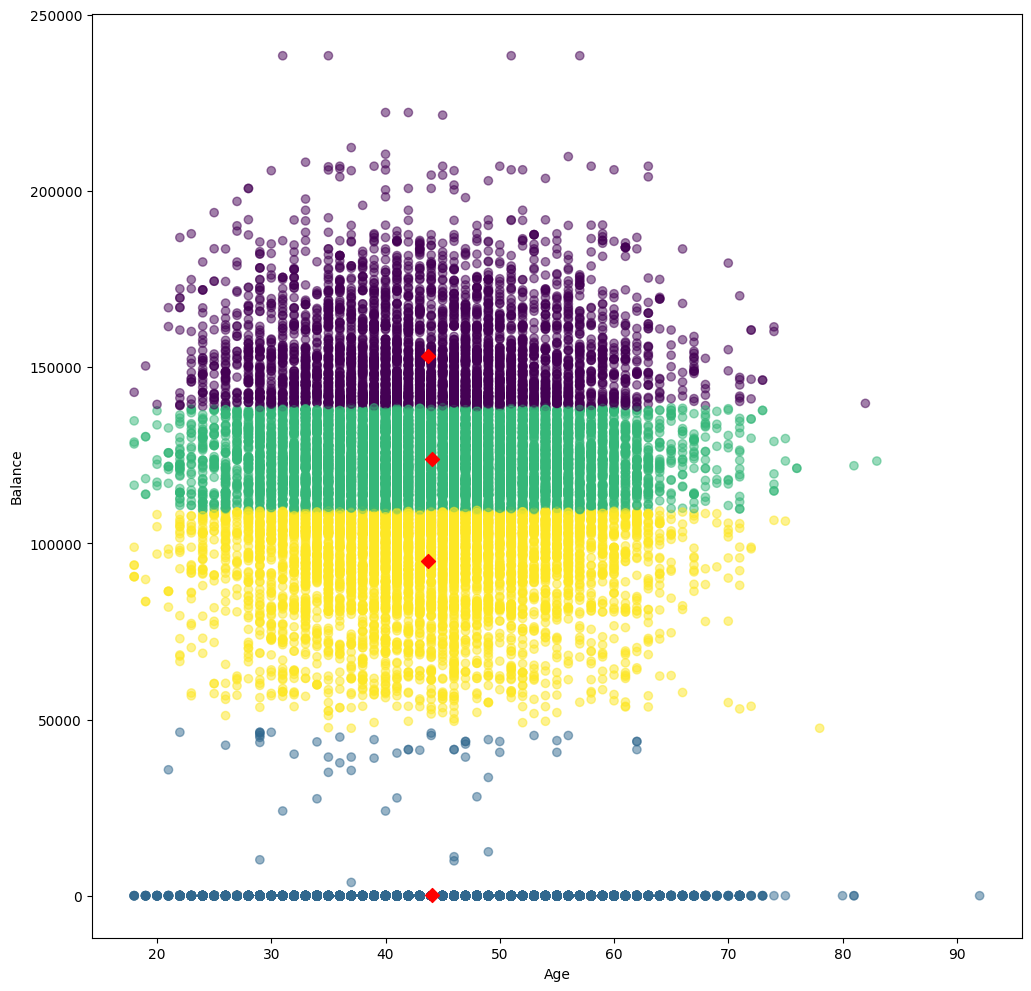

In [ ]:
kmeans_draw_plot(df_churn, 'Age', 'Balance', 4)

- 이탈 안한 고객도 포함

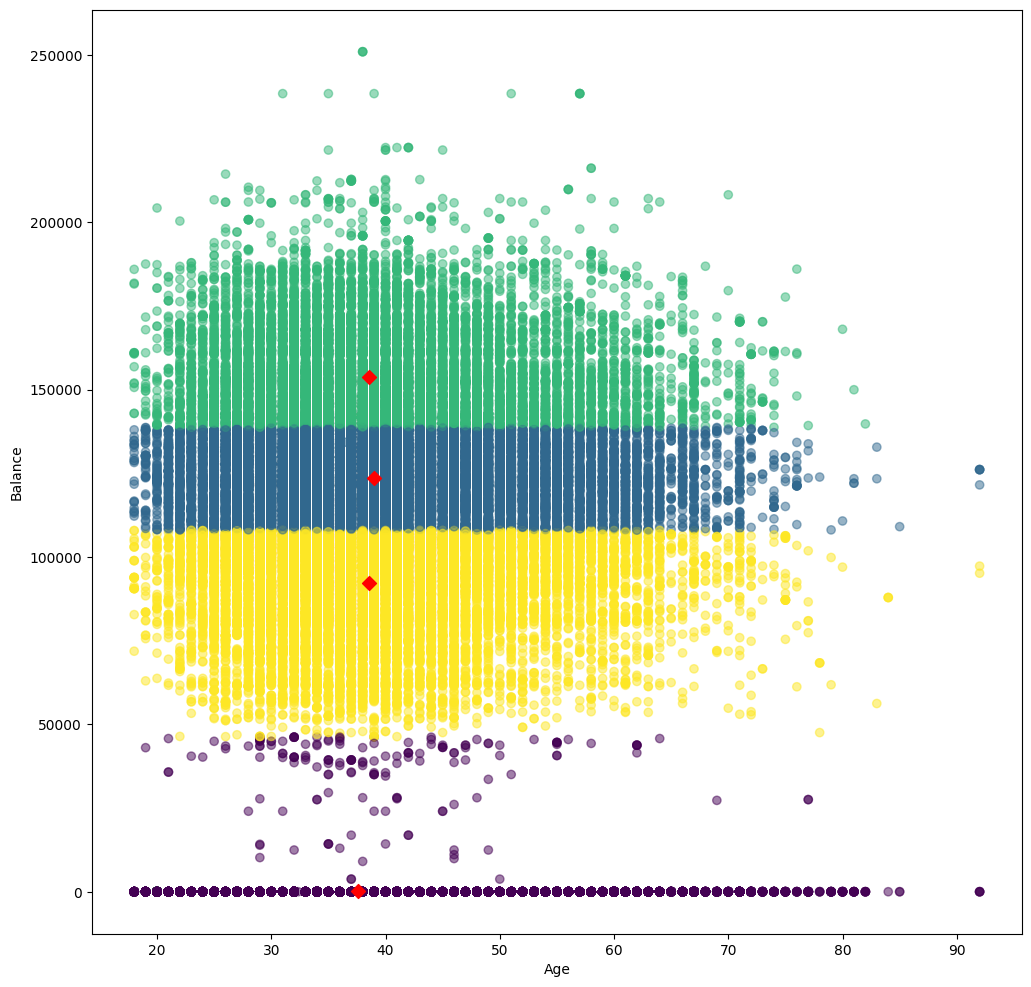

In [ ]:
kmeans_draw_plot(df, 'Age', 'Balance', 4)

- 이탈 고객만

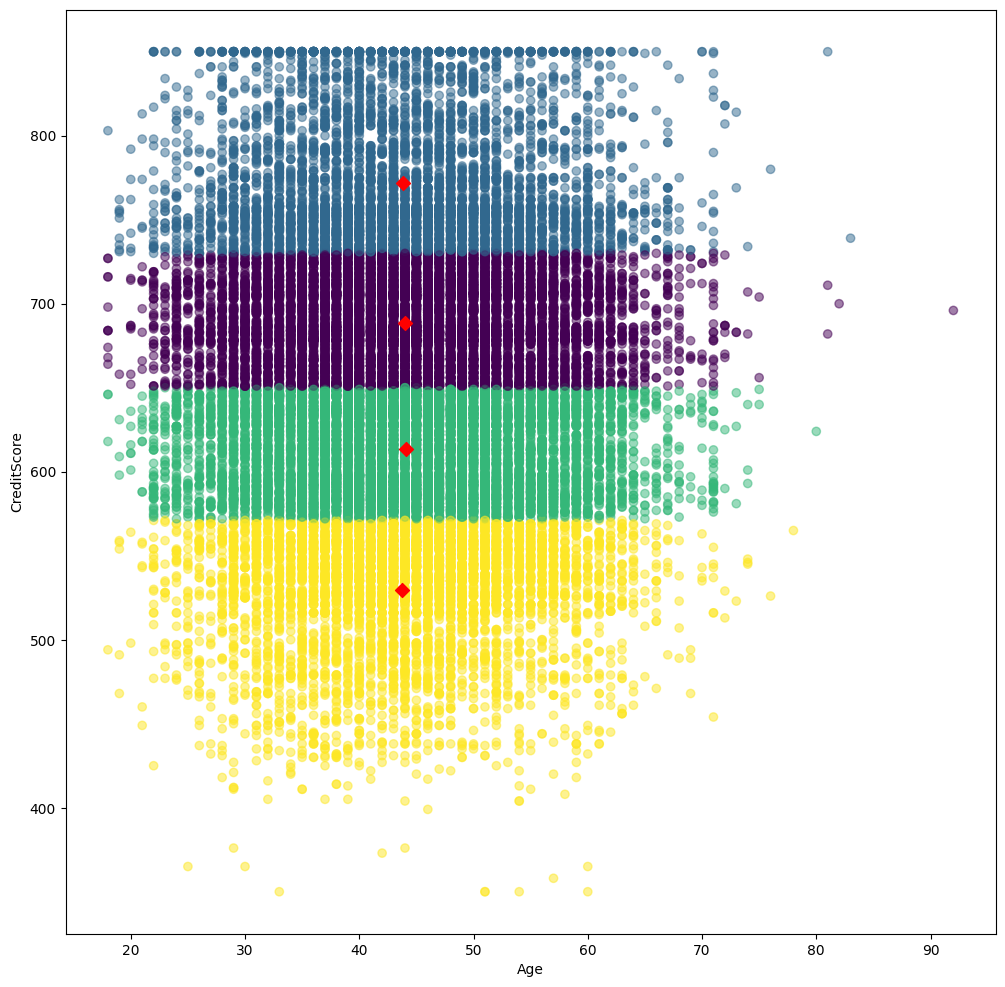

In [ ]:
kmeans_draw_plot(df_churn, 'Age', 'CreditScore', 4)

- 이탈 안한 고객 포함

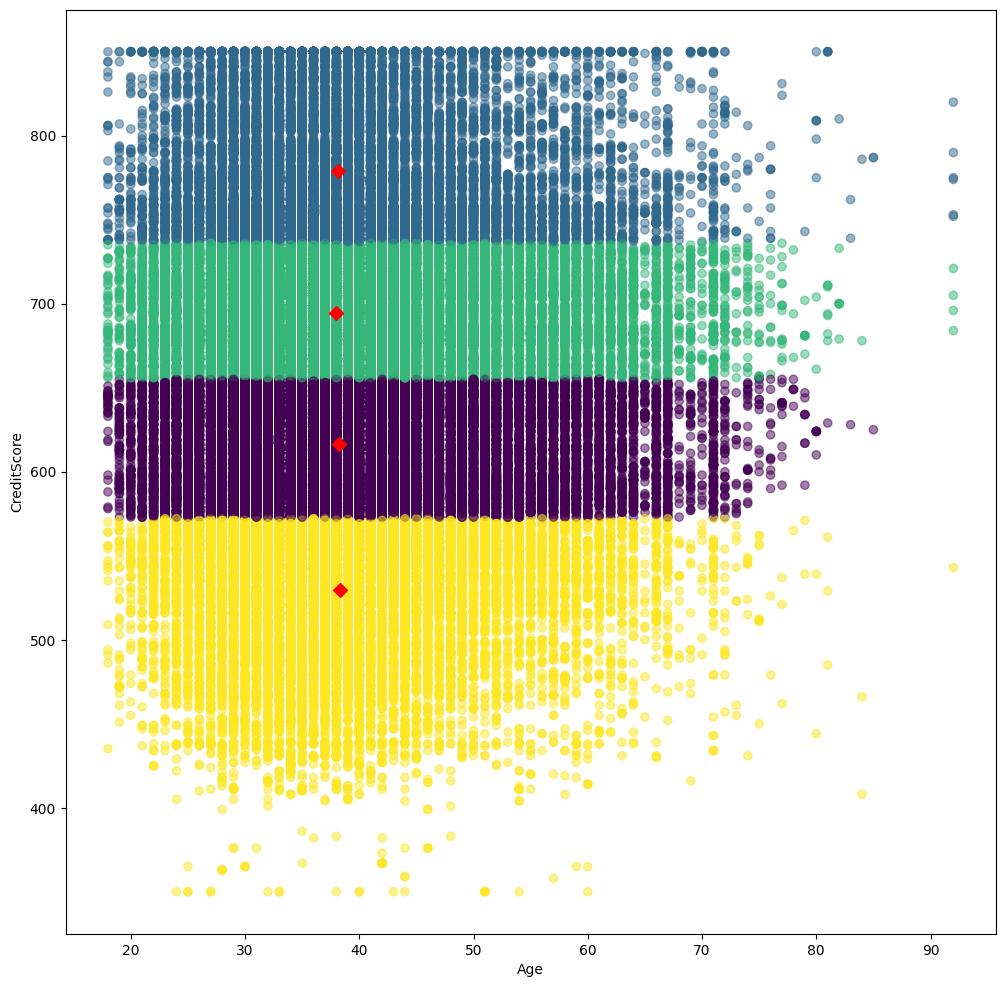

In [ ]:
kmeans_draw_plot(df, 'Age', 'CreditScore', 4)

- 이탈 고객만

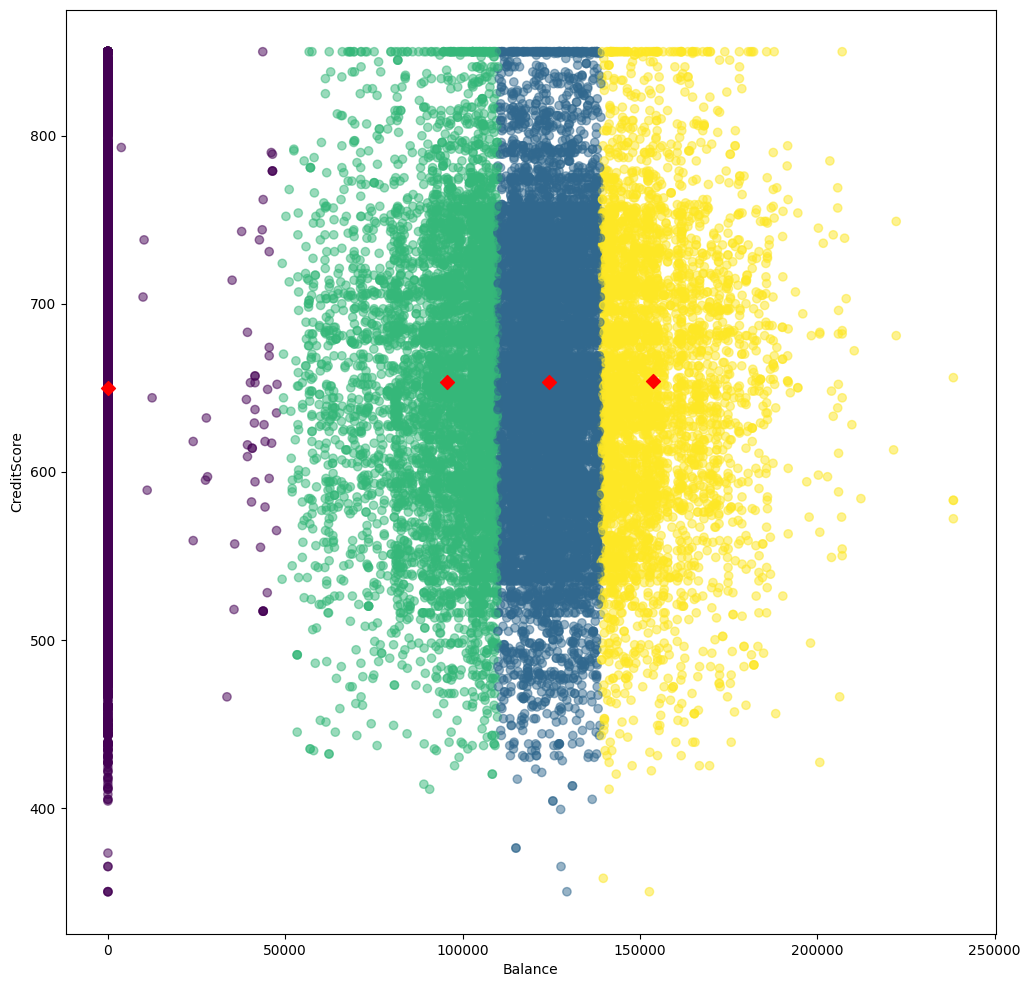

In [ ]:
kmeans_draw_plot(df_churn, 'Balance', 'CreditScore', 4)

- 이탈 안한 고객 포함

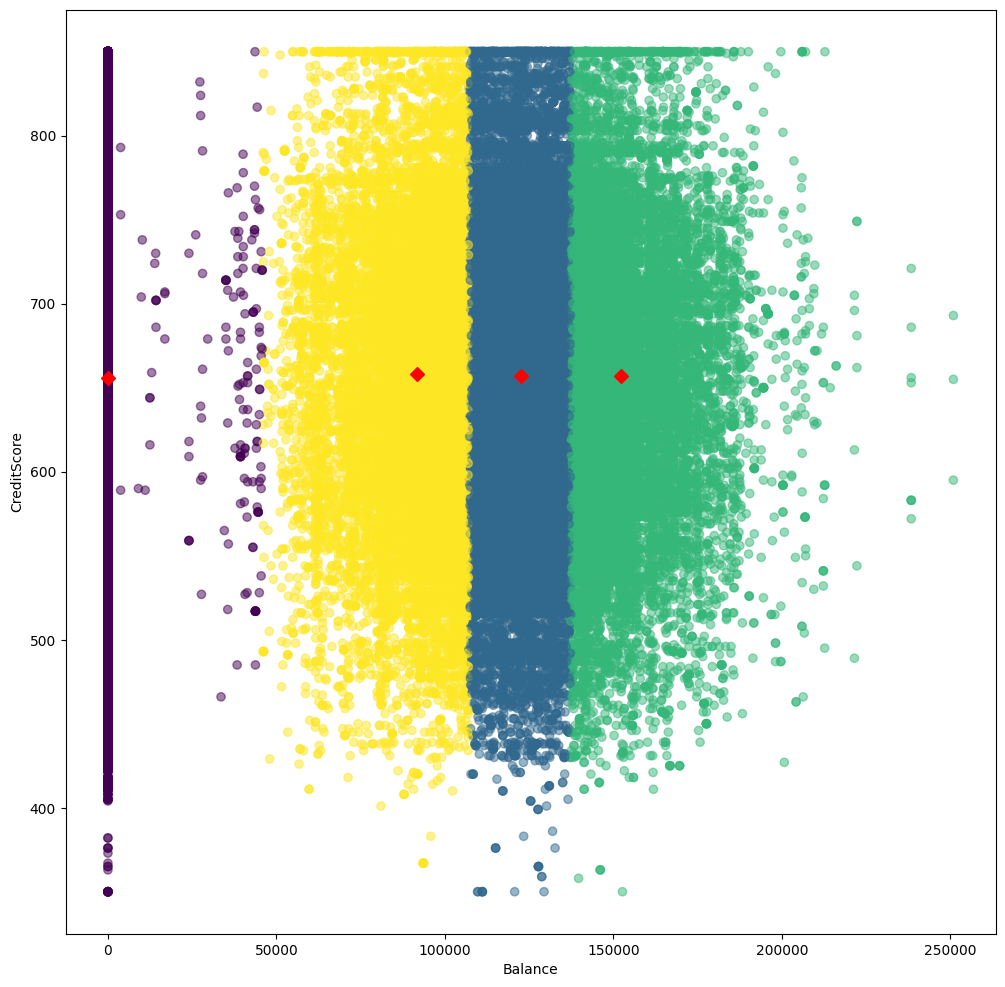

In [ ]:
kmeans_draw_plot(df, 'Balance', 'CreditScore', 4)

- 이탈 고객만

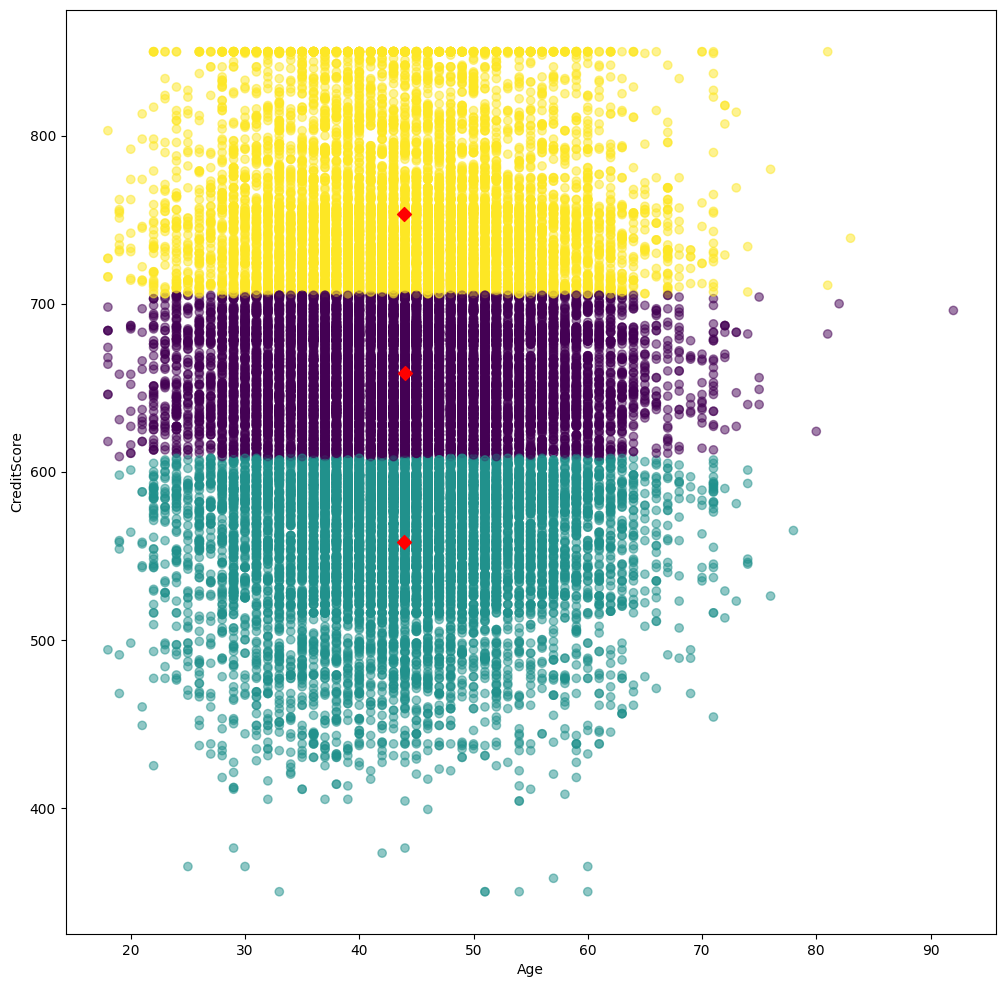

In [ ]:
kmeans_draw_plot(df_churn, 'Age', 'CreditScore', 3)

- 이탈 안한 고객 포함

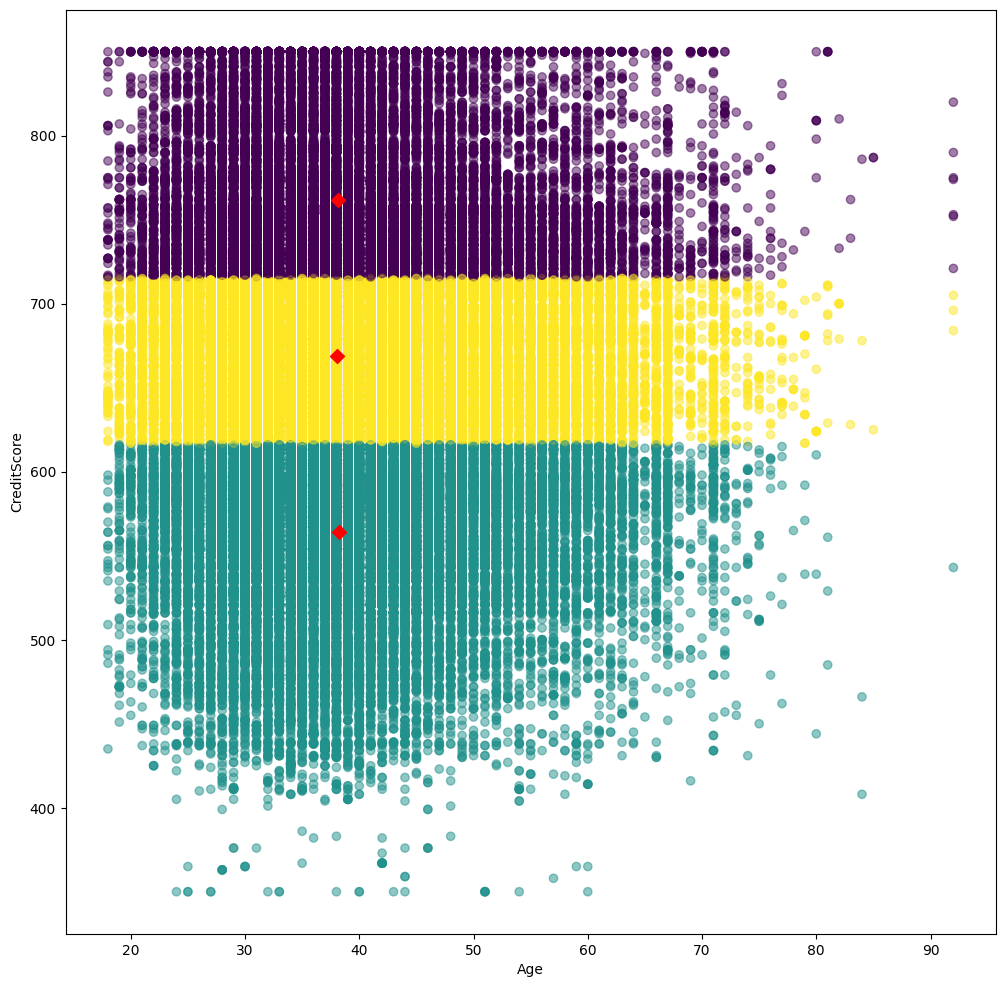

In [ ]:
kmeans_draw_plot(df, 'Age', 'CreditScore', 3)

- 이탈 고객만

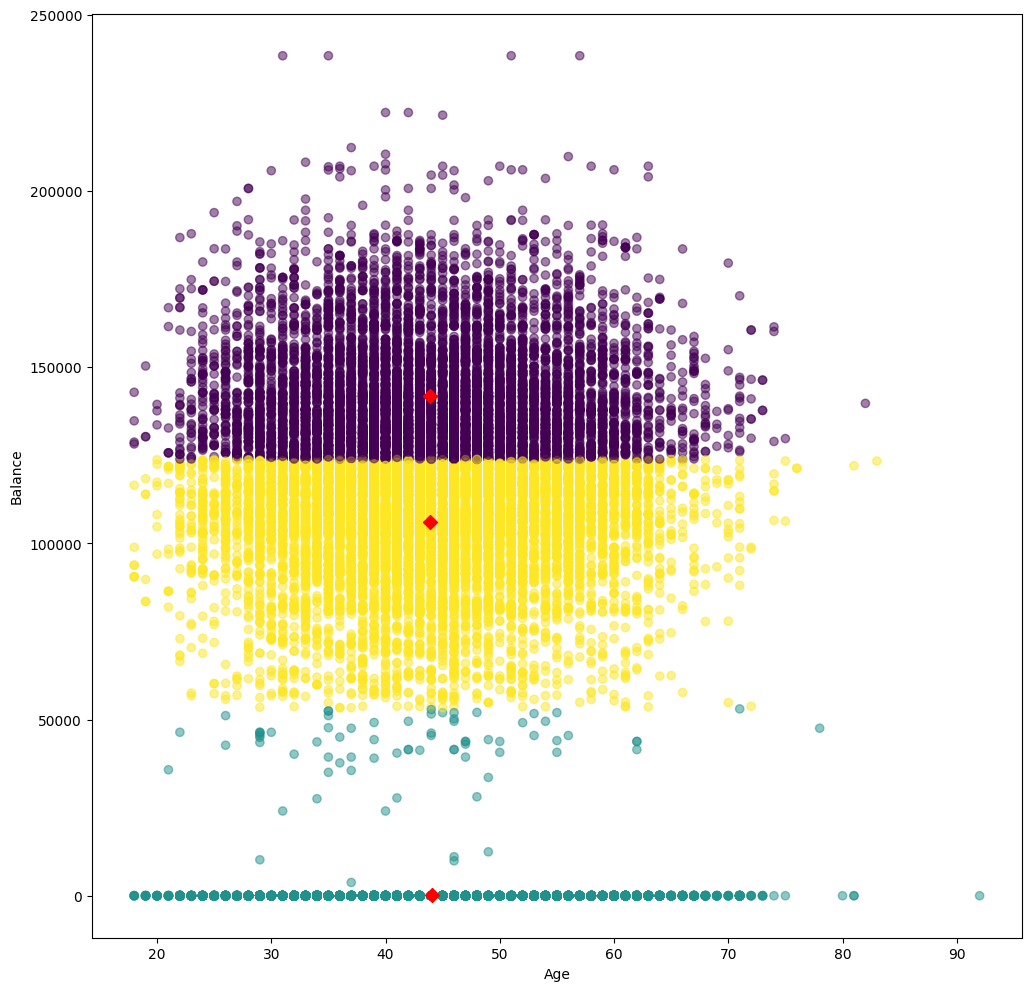

In [ ]:
kmeans_draw_plot(df_churn, 'Age', 'Balance', 3)

- 이탈 안한 고객 포함

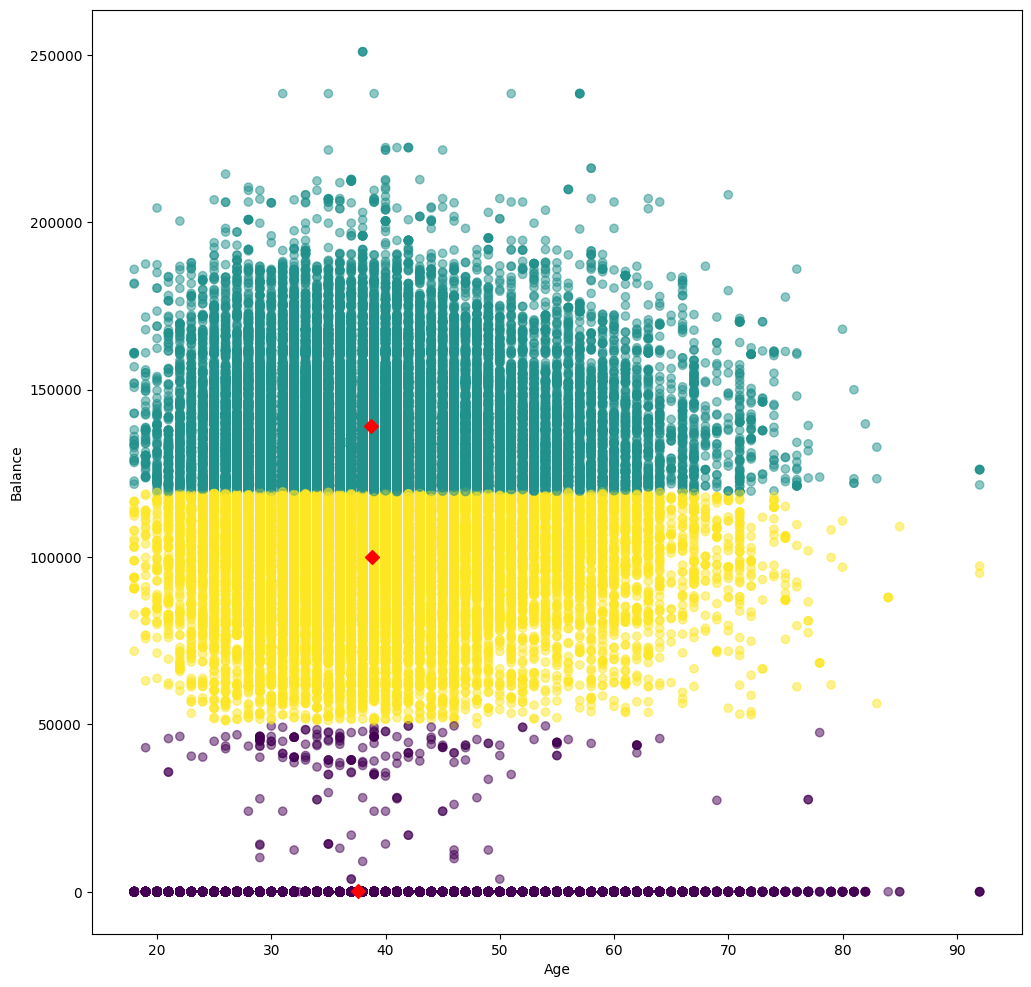

In [ ]:
kmeans_draw_plot(df, 'Age', 'Balance', 3)

- 이탈 고객만

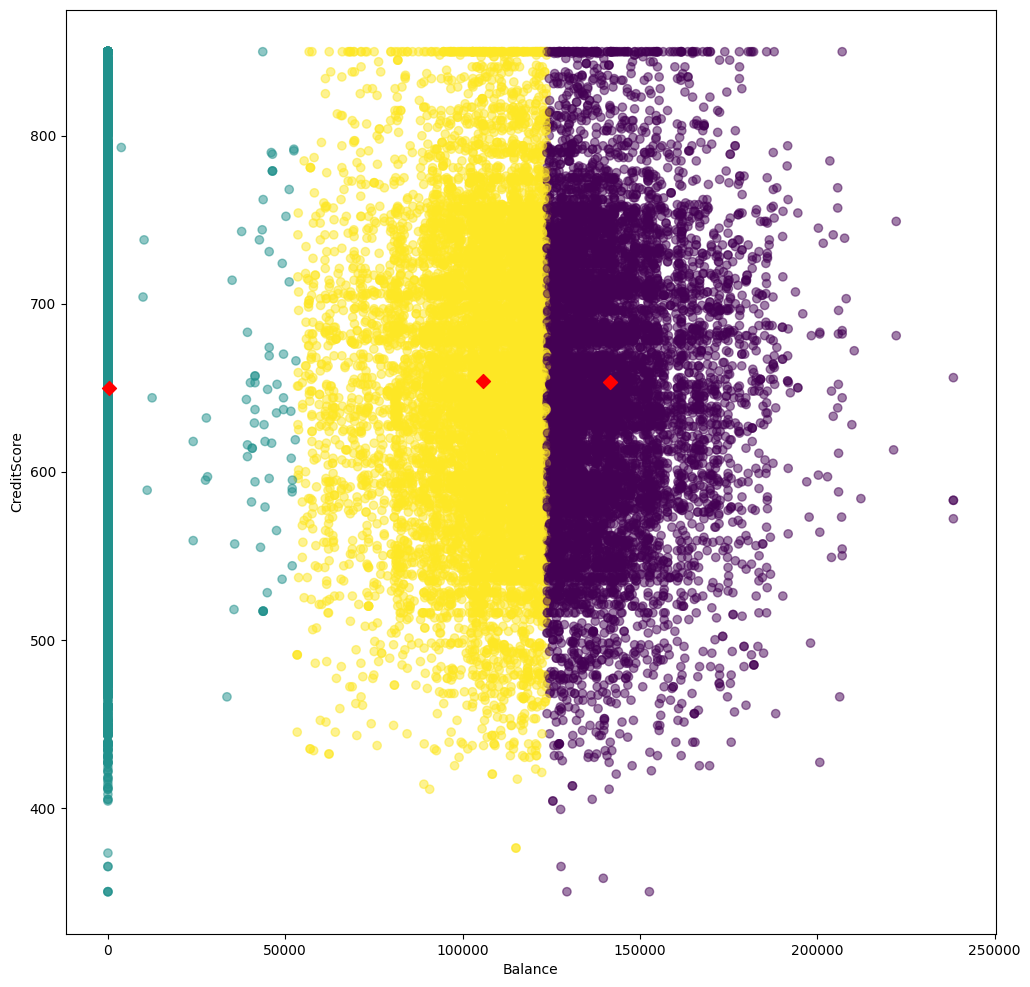

In [ ]:
kmeans_draw_plot(df_churn, 'Balance', 'CreditScore', 3)

- 이탈 안한 고객 포함

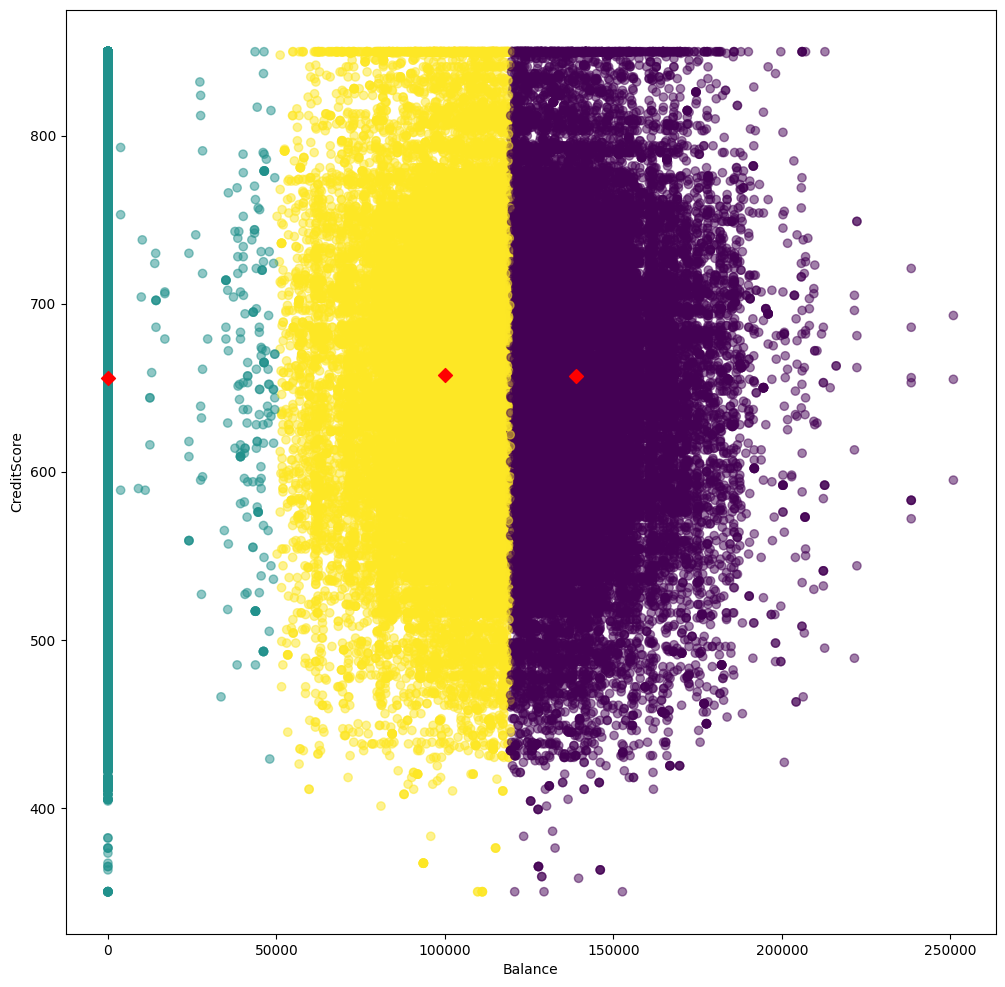

In [ ]:
kmeans_draw_plot(df, 'Balance', 'CreditScore', 3)

- 이탈 고객만

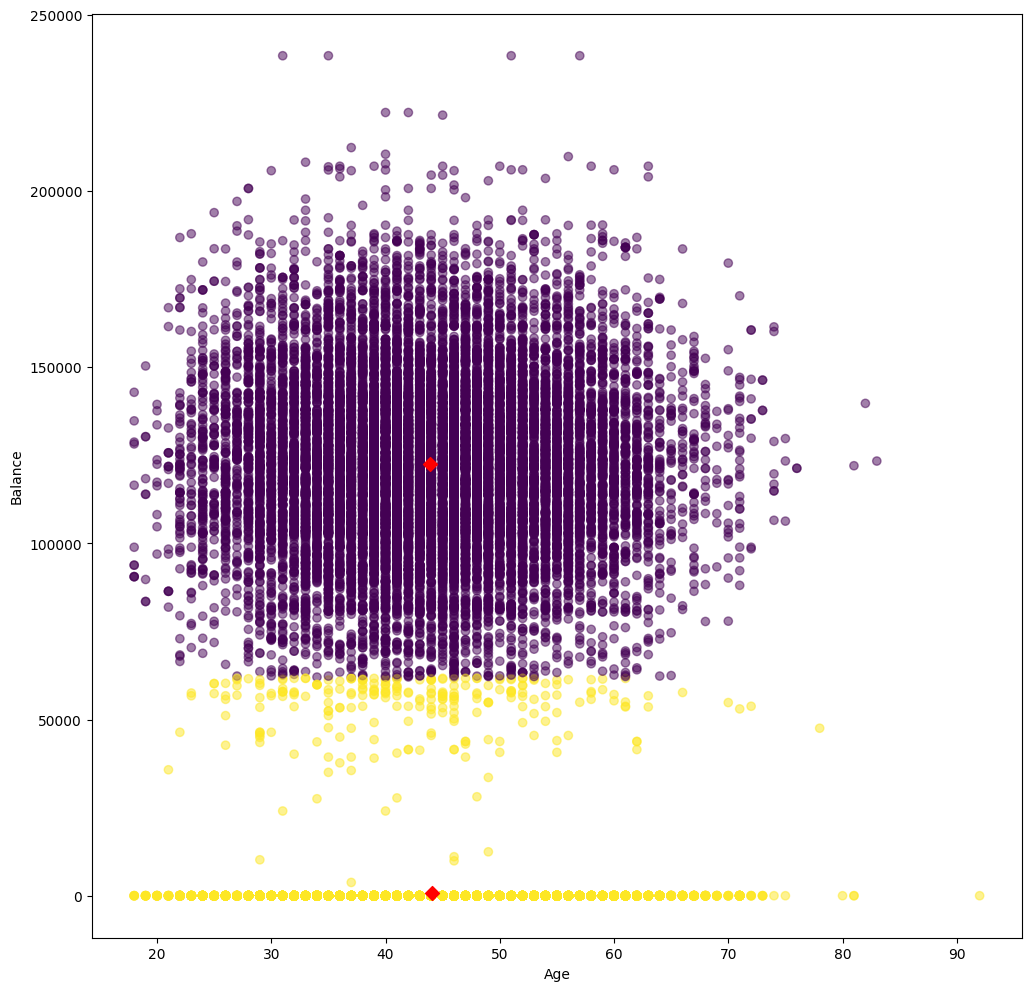

In [ ]:
kmeans_draw_plot(df_churn, 'Age', 'Balance', 2)

- 이탈 안한 고객 포함

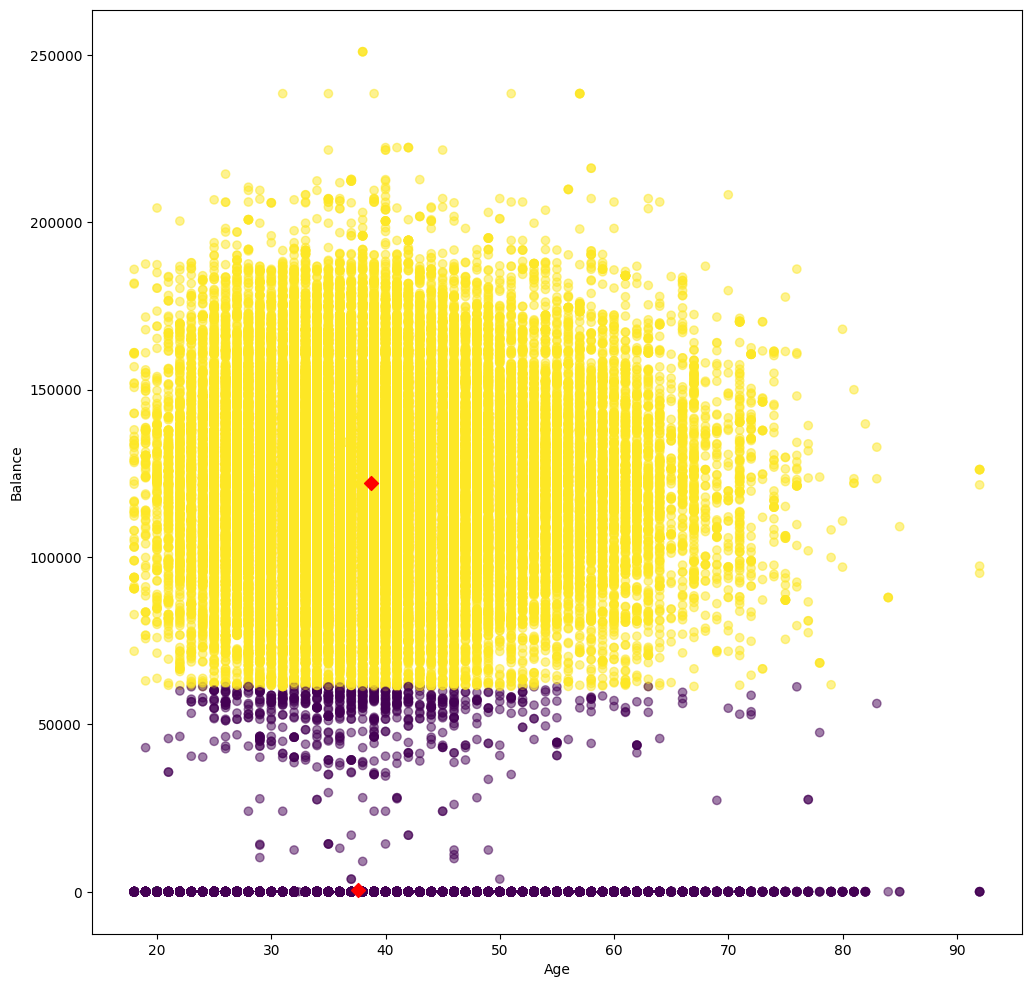

In [ ]:
kmeans_draw_plot(df, 'Age', 'Balance', 2)

- --> 정리
  - --> KMeans는 각 집단의 중심점을 바탕으로 군집화를 진행하기 때문에 이탈한 고객만 대상으로 진행하나, 이탈안한 고객도 포함하여 진행하나 빈도수가 달랐다 뿐이므로 의미있는 고객 세그먼트를 파악하기 어려움
  - --> 다른 변수에 따른 클러스터링도 시도해볼 수는 있으나 카테고리형 변수이므로 마찬가지로 각 군집의 중심점을 이용해 군집화 시키는 KMeans 클러스터링에는 딱히 의미가 없을 것으로 판단
  - --> 또한, 갖고 있는 데이터셋 변수의 개수는 많은데 의미 해석을 위해서는 2차원 평면으로 나타내어야 하므로(사용가능한 변수가 2개뿐) KMeans를 이용한 군집화는 의미가 없어보임

# 2. Tenure를 이용한 코호트 분석

- 목표 1. tenure 값 중 이탈률이 가장 높았던 기간 발견
- 목표 2. 기간 별로 balance, age, numofproducts, creditscore를 판단하여 어떤 집단의 이탈을 어떻게 막아야 하는지 마케팅 전략 제시

In [ ]:
df.head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  Female  \
0             0.0        181449.97       0       1        0      0       0   
1             1.0         49503.50       0       1        0      0       0   
2             0.0        184866.69       0       1        0      0       0   
3             1.0         84560.88       0       1        0      0       0   
4             1.0         15068.83       0       0        0      1       0   

   Male  
0     1  
1     1  
2     1  
3     1  
4     1

- 이탈률이 가장 높았던 기간 확인

In [ ]:
df.groupby(['Tenure'])['Exited'].mean().sort_values(ascending=False)

Tenure
0     0.254694
3     0.229209
4     0.226459
1     0.226217
5     0.220290
10    0.212568
9     0.212203
6     0.198849
8     0.198024
2     0.194896
7     0.187704
Name: Exited, dtype: float64

- 기간 별로 balance 파악

In [ ]:
df.groupby(['Tenure'])['Balance'].mean().sort_values(ascending=False)

Tenure
0     61754.463178
10    58534.899629
1     57907.344896
3     56477.889236
5     55820.729057
6     55333.724292
9     55281.894350
8     54907.030955
4     54320.584116
2     53665.299814
7     53026.467574
Name: Balance, dtype: float64

- --> 정리
  - tenure = 0 : 평균 잔액이 가장 높았으나 이탈률도 가장 높은 집단
    1. 개인화된 환영 메시지 및 안내
      - 새로 가입한 고객에게 개인화된 환영 메시지를 보내고, 은행 서비스의 기능과 혜택을 간단하게 안내 및 도움말 제공
    2. 1년 이상 가입 유지시 금리 인상 적용되는 예적금 상품 소개
      - 고객의 자산을 은행에 오랜 기간 묶어둘 수 있는 예적금 상품 제공
  - tenure = 1, 3, 5 : 평균 잔액, 이탈률 모두 상위 5위 안에 드는 집단
    1. 고객 세그먼테이션 및 개인화
      - 해당 기간 동안의 금융 이력을 분석하여 고객의 우선순위, 선호도를 이해하고 그에 맞는 서비스를 제공
    2. 금융 계획과 목표 도움
      - 고객들의 금융 목표와 계획을 지속적으로 파악하고, 그에 맞는 금융 상품 및 서비스를 추천
  

- 기간 별로 age 파악 - 계약 기간이 0인 이탈 고객만

In [ ]:
df_churn[df_churn['Tenure'] == 0].head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
6           797  55.0       0   99208.46              2        0.0   
15          648  56.0       0  110939.30              1        1.0   
22          659  39.0       0  107042.74              1        1.0   
25          558  47.0       0       0.00              1        1.0   
41          660  33.0       0   83036.05              1        0.0   

    IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  Female  \
6              1.0         62402.38       1       0        0      1       1   
15             1.0         92927.42       1       0        0      1       0   
22             0.0        102284.20       1       0        0      1       1   
25             1.0        118740.69       1       1        0      0       0   
41             0.0        154990.58       1       1        0      0       1   

    Male  
6      0  
15     1  
22     0  
25     1  
41     0

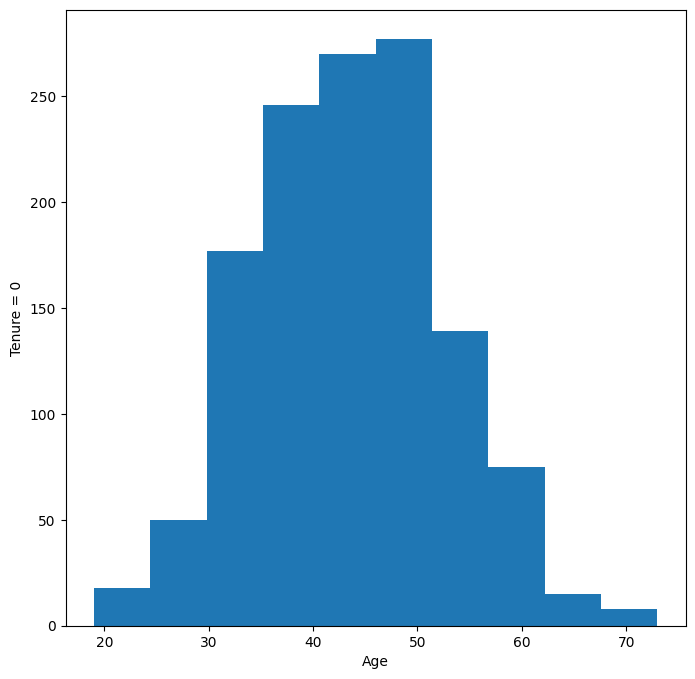

In [ ]:
plt.figure(figsize=(8,8))

plt.hist(df_churn[df_churn['Tenure'] == 0]['Age'])

plt.xlabel('Age')
plt.ylabel('Tenure = 0')
plt.show();

- --> 정리
  - tenure = 0인 고객 중에서 이탈 고객만
  - 30-50대 맞춤 마케팅 전략 필요
    1. 맞춤형 금융 상품 및 서비스 제공
      - 연금 저축, 주택담보대출, 자녀 교육 자금 계획 등을 고려한 상품을 개발하고 홍보
    2. 사회적 책임과 연관된 마케팅
      - 사회적 책임을 강조하는 마케팅 전략을 활용하여 해당 연령층의 관심을 끌고, 긍정적 이미지를 형성

- 기간 별로 NumOfProducts 파악  - 계약 기간이 0인 이탈 고객만

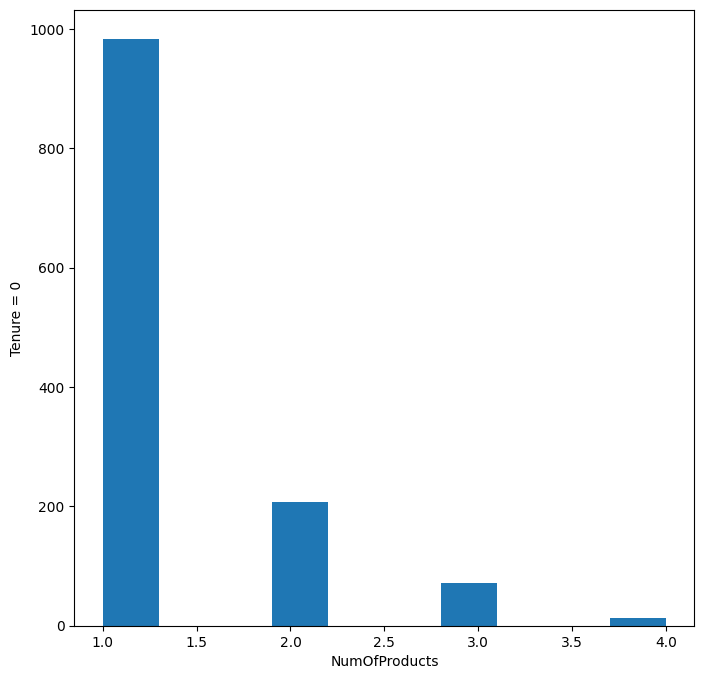

In [ ]:
plt.figure(figsize=(8,8))

plt.hist(df_churn[df_churn['Tenure'] == 0]['NumOfProducts'])


plt.xlabel('NumOfProducts')
plt.ylabel('Tenure = 0')
plt.show();

- --> 정리
  - tenure = 0인 고객 중에서 이탈 고객만
  - 추가적으로 상품 가입을 유도할 수 있는 방안 모색
    1. 현재 가입한 상품을 사용하고 있는 고객에게 추가 혜택을 부여
      - 추가 수수료 면제, 이자율 우대, 적립금 프로그램 등의 혜택을 제공

- 기간 별로 creditscore 파악 - 계약 기간이 0인 이탈 고객만

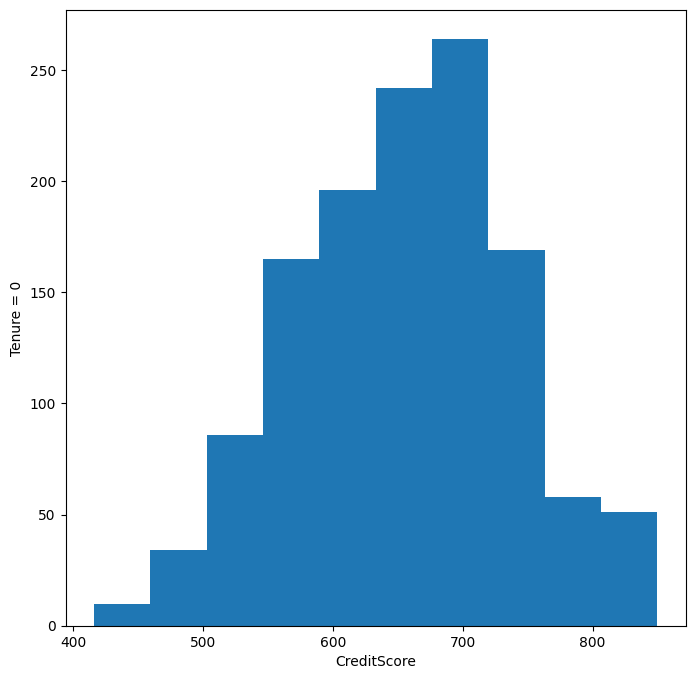

In [ ]:
plt.figure(figsize=(8,8))

plt.hist(df_churn[df_churn['Tenure'] == 0]['CreditScore'])


plt.xlabel('CreditScore')
plt.ylabel('Tenure = 0')
plt.show();

- --> 정리
  - 신용 점수가 550-750으로 중간 점수인 고객 맞춤 마케팅 전략
    1. 신용점수 개선 프로그램
      - 정기적인 신용점수 모니터링 서비스를 제공
      - 해당 범위 내에서 신용점수를 개선할 수 있는 프로그램을 제공 -> 신용 점수가 향상되면 추가 혜택이 주어지는 방식으로 고객들에게 동기 부여